<a href="https://colab.research.google.com/github/ahmedhassan97/classification-using-keras/blob/master/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install patool

In [11]:
#to extract file.rar
import patoolib
patoolib.extract_archive("data.rar")


patool: Extracting data.rar ...
patool: running /usr/bin/unrar x -- /content/data.rar
patool:     with cwd='./Unpack_vc4wld9v'
patool: ... data.rar extracted to `data'.


'data'

In [12]:
#install open cv for computer vision
pip install opencv-python

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

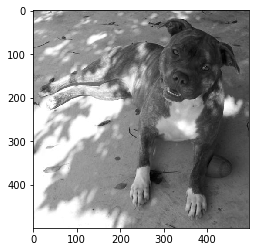

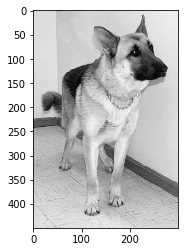

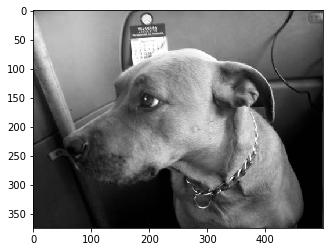

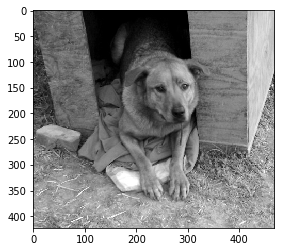

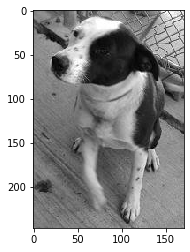

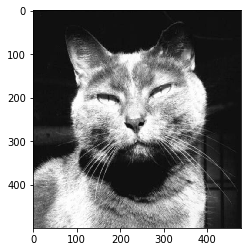

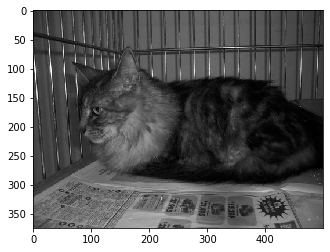

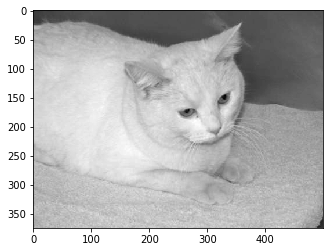

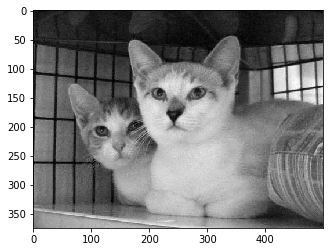

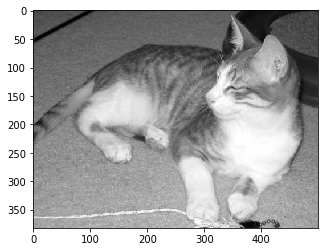

In [15]:
DATADIR = 'data'
CATEGORIES = ["dog", "cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        if x==5 : 
            break

In [16]:
print(img_array)
print(img_array.shape)

[[ 69  67  67 ...  39  38  38]
 [ 71  69  69 ...  44  45  45]
 [ 73  71  71 ...  51  53  55]
 ...
 [162 164 165 ... 156 157 158]
 [165 165 164 ... 155 156 157]
 [162 164 165 ... 154 154 154]]
(382, 500)


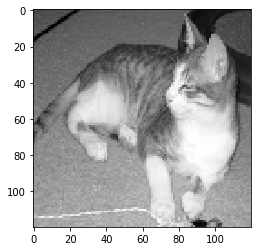

In [17]:
IMG_SIZE = 120

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [19]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
       
        print("class num is ",class_num)
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array,class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

 18%|█▊        | 89/500 [00:00<00:00, 885.71it/s]

class num is  0


 19%|█▉        | 96/500 [00:00<00:00, 950.09it/s]

class num is  1


100%|██████████| 500/500 [00:00<00:00, 966.75it/s]

999


In [20]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:

   if sample[1] == 0:
          kind = "dog"
   else:
          kind = "cat"  

   print(kind)

cat
cat
cat
cat
cat
dog
dog
cat
dog
dog


In [21]:
training_data[808]


[array([[101,  98,  96, ...,  46,  41,  44],
        [107,  92,  78, ...,  45,  41,  44],
        [ 90,  68,  35, ...,  50,  40,  42],
        ...,
        [ 47,  31,  36, ...,  14,  11,  13],
        [ 51,  67,  38, ...,  14,  11,  13],
        [ 33,  49,  59, ...,  13,  12,  13]], dtype=uint8), 1]

In [22]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[ 26]
   [ 28]
   [ 28]
   ...
   [ 18]
   [ 18]
   [ 65]]

  [[ 27]
   [ 29]
   [ 30]
   ...
   [ 18]
   [ 18]
   [ 60]]

  [[ 29]
   [ 30]
   [ 32]
   ...
   [ 18]
   [ 18]
   [ 64]]

  ...

  [[ 91]
   [ 92]
   [ 98]
   ...
   [ 67]
   [107]
   [ 99]]

  [[104]
   [ 83]
   [ 82]
   ...
   [ 63]
   [ 80]
   [ 99]]

  [[ 79]
   [ 52]
   [ 78]
   ...
   [ 65]
   [ 64]
   [101]]]]


In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [25]:
model.fit(X, y, epochs=100)


Train on 999 samples
Epoch 1/100
999/999 [==============================] - 2s 2ms/sample - loss: 0.7158 - acc: 0.5125
Epoch 2/100
999/999 [==============================] - 0s 94us/sample - loss: 0.7029 - acc: 0.4835
Epoch 3/100
999/999 [==============================] - 0s 99us/sample - loss: 0.6973 - acc: 0.4905
Epoch 4/100
999/999 [==============================] - 0s 88us/sample - loss: 0.6951 - acc: 0.5245
Epoch 5/100
999/999 [==============================] - 0s 89us/sample - loss: 0.7021 - acc: 0.4805
Epoch 6/100
999/999 [==============================] - 0s 91us/sample - loss: 0.7066 - acc: 0.4995
Epoch 7/100
999/999 [==============================] - 0s 93us/sample - loss: 0.7094 - acc: 0.5055
Epoch 8/100
999/999 [==============================] - 0s 89us/sample - loss: 0.7013 - acc: 0.4815
Epoch 9/100
999/999 [==============================] - 0s 88us/sample - loss: 0.6954 - acc: 0.4945
Epoch 10/100
999/999 [==============================] - 0s 92us/sample - loss: 0.7045 - a

In [26]:
test_loss, test_acc = model.evaluate(X,y)
test_acc*100

999/999 [==============================] - 0s 92us/sample - loss: 0.6937 - acc: 0.5015


50.15015006065369

In [0]:
model.save('model.h5')


In [51]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import tensorflow as tf 
model = tf.keras.models.load_model('model.h5')
# dimensions of our images
img_width, img_height = 320, 240

# load the model we saved
#model = load_model('./model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
img_width=120
img_height =120
# predicting images
img = image.load_img('dog1.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE)
print(images)
#images.reshape(1,3)
classes = model.predict_classes(images, batch_size=10)
classes.reshape(1,3)
print (classes)

# predicting multiple images at once


[[[[ 58.  72.  85.]
   [ 62.  76.  89.]
   [ 42.  55.  63.]
   ...
   [ 32.  37.  43.]
   [ 37.  41.  52.]
   [ 43.  50.  56.]]

  [[ 52.  66.  79.]
   [ 61.  75.  88.]
   [ 42.  55.  63.]
   ...
   [ 35.  41.  41.]
   [ 39.  44.  48.]
   [ 48.  55.  61.]]

  [[ 51.  65.  78.]
   [ 58.  72.  85.]
   [ 40.  53.  61.]
   ...
   [ 49.  54.  57.]
   [ 49.  53.  62.]
   [ 49.  56.  62.]]

  ...

  [[ 85.  86.  88.]
   [ 88.  89.  94.]
   [ 76.  77.  81.]
   ...
   [ 95.  96. 100.]
   [102. 103. 107.]
   [114. 115. 119.]]

  [[ 85.  86.  88.]
   [ 77.  78.  83.]
   [ 81.  82.  86.]
   ...
   [ 91.  92.  96.]
   [ 99. 100. 104.]
   [ 81.  82.  86.]]

  [[ 93.  94.  96.]
   [ 77.  78.  83.]
   [ 74.  75.  79.]
   ...
   [ 89.  90.  94.]
   [ 69.  70.  74.]
   [ 88.  89.  93.]]]]


ValueError: ignored